<a href="https://colab.research.google.com/github/RaiUttamRai/Adding-a-file-in-dot-net-core-mvc/blob/main/Fashion_mnist(Multiclass_Classificaiton).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To practice multi class classification we're going to build a neural network to classify images of different items of clothings

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

#the data has already been sorted into training and test for us
(train_data,train_labels),(test_data,test_labels)= fashion_mnist.load_data()



29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
#show the first training example
print(f"training sample:\n{train_data}\n")
print(f"training labels:\n{train_labels}\n")

training sample:
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]

training labels:
[9 0 0 ... 3 0 5]



In [ ]:
#check the shape of single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

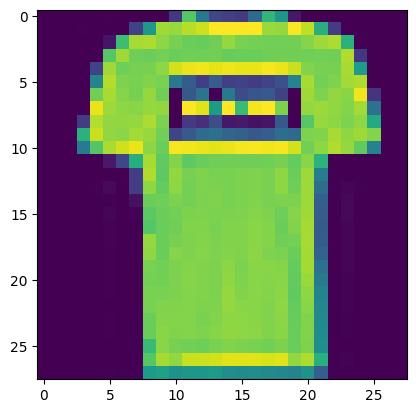

In [ ]:
#plot single image/sample
import matplotlib.pyplot as plt
plt.imshow(train_data[1])

In [ ]:
#check out sample labels
train_labels[7]

np.uint8(2)

In [ ]:
#create a small list so we can index onto our trainng labels so they are human readable form
class_name=["T-shirt/top","Trouser","	Pullover","	Dress","	Coat","	Sandal","Shirt","Sneaker","	Bag","	Ankle boot"]
len(class_name)

10

Text(0.5, 1.0, '\tDress')

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


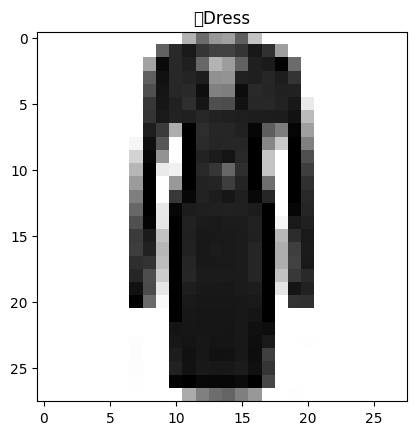

In [ ]:
#plot an example image and its label
index_of_choice=20101
plt.imshow(train_data[index_of_choice],cmap=plt.cm.binary)
plt.title(class_name[train_labels[index_of_choice]])

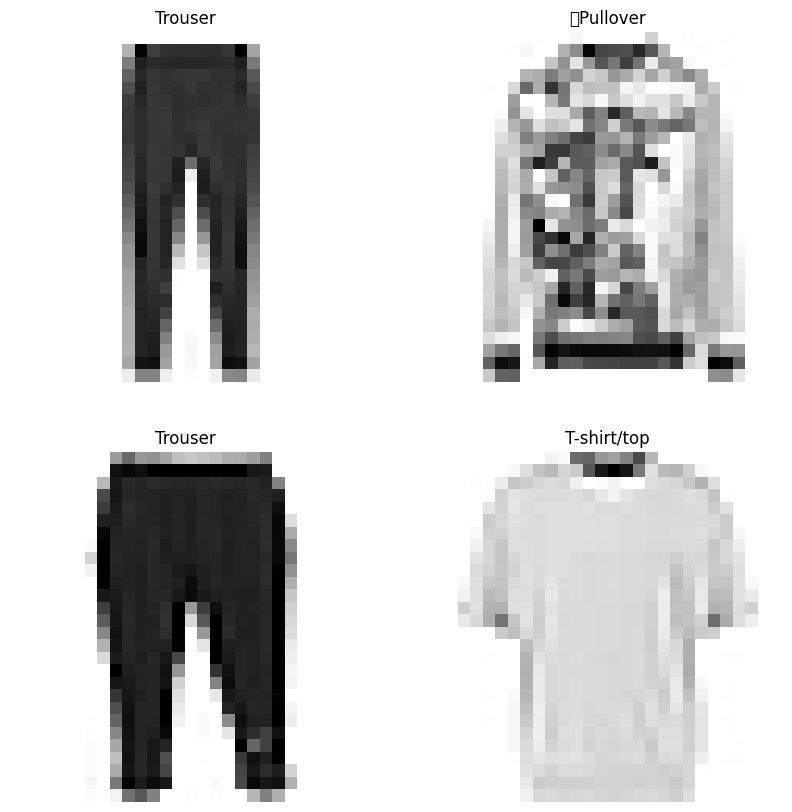

In [ ]:
#plot multiple random image of fashion mnist
import random
plt.figure(figsize=(10,10))
for i in range(4):
  ax=plt.subplot(2,2,i+1)
  rand_index=random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_name[train_labels[rand_index]])
  plt.axis(False)

##Building a multiclass classification models

In [ ]:
#seeds the data
tf.random.set_seed(42)
#create a model
model= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])
#compile
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)
#fit the model
non_norm_history=model.fit(train_data,tf.one_hot(train_labels,depth=10),epochs=10,validation_data=(test_data,tf.one_hot(test_labels,depth=10)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.1231 - loss: 3.4020 - val_accuracy: 0.1675 - val_loss: 2.1355
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1975 - loss: 1.9739 - val_accuracy: 0.2184 - val_loss: 1.8125
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2466 - loss: 1.7434 - val_accuracy: 0.2295 - val_loss: 1.8061
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2768 - loss: 1.6604 - val_accuracy: 0.3045 - val_loss: 1.6299
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3241 - loss: 1.5815 - val_accuracy: 0.3624 - val_loss: 1.5208
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.3491 - loss: 1.5172 - val_accuracy: 0.3793 - val_loss: 1.4633
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3874 - loss: 1.4552 - val_accuracy: 0.4219 - val_loss: 1.3739
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4205 - loss: 1.3742 -

##Improving performance with normalization


In [ ]:
#check the min(),max() values of the training data
#we can get our training and testing data between 0 and 1 by dividing by the max
train_data_norm= train_data/255.0
test_data_norm=test_data/255.0
#check the min and max values of the scaled training data
train_data_norm.min(),train_data_norm.max()

(np.float64(0.0), np.float64(1.0))

In [ ]:
#seeds the data
tf.random.set_seed(42)
#create a model
model_1= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])
#compile
model_1.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)
#fit the model
norm_history=model_1.fit(train_data_norm,train_labels,epochs=10,validation_data=(test_data_norm,test_labels))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3878 - loss: 1.6799 - val_accuracy: 0.6956 - val_loss: 0.9179
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7184 - loss: 0.8344 - val_accuracy: 0.7256 - val_loss: 0.7371
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7415 - loss: 0.7002 - val_accuracy: 0.7347 - val_loss: 0.6817
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7570 - loss: 0.6530 - val_accuracy: 0.7576 - val_loss: 0.6493
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7750 - loss: 0.6211 - val_accuracy: 0.7689 - val_loss: 0.6288
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7853 - loss: 0.6020 - val_accuracy: 0.7724 - val_loss: 0.6183
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7889 - loss: 0.5895 - val_accuracy: 0.7782 - val_loss: 0.6108
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7916 - loss: 0.5806 -

<Axes: title={'center': 'normalized data'}>

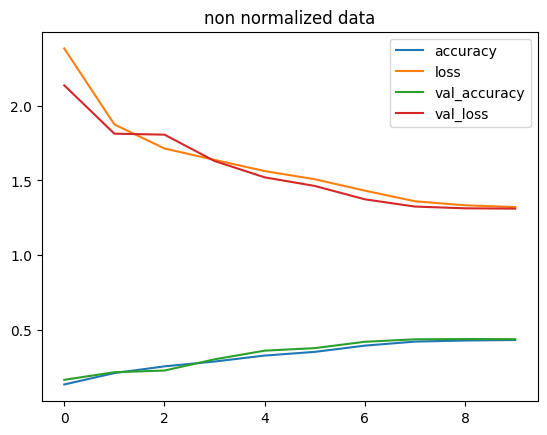

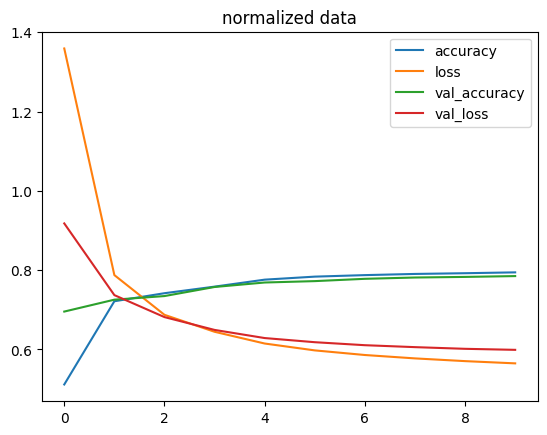

In [ ]:
#comparing normalized and non normalized data
#non normalized data
import pandas as pd
pd.DataFrame(non_norm_history.history).plot(title="non normalized data")
#nomralized data
pd.DataFrame(norm_history.history).plot(title="normalized data")

In [ ]:
#find the ideal learning rate
#seeds the data
tf.random.set_seed(42)
#create a model
model_2= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])
#compile
model_2.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)
#create the learning rate callbacks=
lr_scheduler= tf.keras.callbacks.LearningRateScheduler(lambda epochs:1e-3*10**(epochs/20))
#fit the model
find_lr_history=model_2.fit(train_data_norm,train_labels,epochs=40,validation_data=(test_data_norm,test_labels),callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3725 - loss: 1.5921 - val_accuracy: 0.6853 - val_loss: 0.8426 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7140 - loss: 0.7764 - val_accuracy: 0.7517 - val_loss: 0.7053 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7817 - loss: 0.6397 - val_accuracy: 0.7972 - val_loss: 0.6080 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8095 - loss: 0.5775 - val_accuracy: 0.8015 - val_loss: 0.5876 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8148 - loss: 0.5556 - val_accuracy: 0.8068 - val_loss: 0.5735 - learning_rate: 0.0016
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8182 - loss: 0.5411 - val_accuracy: 0.8089 - val_loss: 0.5625 - learning_rate: 0.0018
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8212 - l

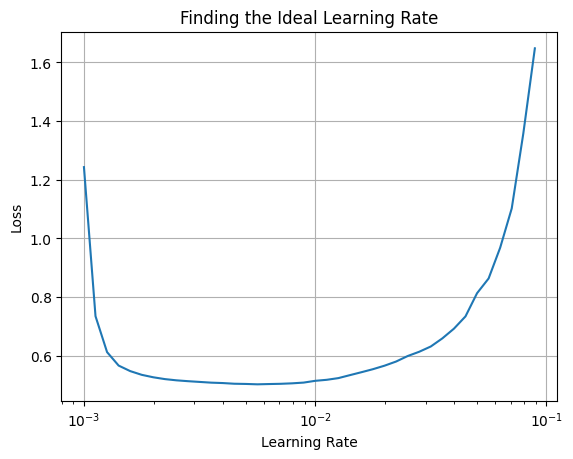

In [ ]:
#plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Generate 40 learning rates from 1e-6 to 1e-1 (log scale)
lrs = 1e-3 * (10 ** (np.arange(40) / 20))

# Plot
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the Ideal Learning Rate")
plt.grid(True)
plt.show()


In [ ]:
#lets refit a model with ideal learning rate
#seeds the data
tf.random.set_seed(42)
#create a model
model_3= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(8,activation="relu"),
    tf.keras.layers.Dense(8,activation="relu"),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])
#compile
model_3.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)
#fit the model
history_3=model_3.fit(train_data_norm,train_labels,epochs=20,validation_data=(test_data_norm,test_labels))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6452 - loss: 1.0268 - val_accuracy: 0.8090 - val_loss: 0.5518
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8247 - loss: 0.5084 - val_accuracy: 0.8255 - val_loss: 0.5023
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8396 - loss: 0.4651 - val_accuracy: 0.8287 - val_loss: 0.4905
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8465 - loss: 0.4463 - val_accuracy: 0.8326 - val_loss: 0.4781
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8504 - loss: 0.4335 - val_accuracy: 0.8350 - val_loss: 0.4707
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8534 - loss: 0.4241 - val_accuracy: 0.8363 - val_loss: 0.4664
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8568 - loss: 0.4157 - val_accuracy: 0.8396 - val_loss: 0.4609
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8581 - loss: 0.4090 - 

##Evaluation our multiclass classification model


In [ ]:
#create a confusion matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

def make_confusion_matrix(y_true,y_pred,classes=None,figsize=(10,10),text_size=15):

  # Generate confusion matrix
  cm = confusion_matrix(y_true,y_pred)  # create raw confusion matrix
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]  # normalize by row
  n_classes = cm.shape[0]  # get number of classes


  #lets prettify it
  fig, ax = plt.subplots(figsize=figsize)

  # Create the matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)  # display matrix as an image with blue color
  fig.colorbar(cax)  # add color bar on side

  #set labels to be classes
  if classes:
    labels=classes

  else:
    labels =labels = np.arange(cm.shape[0])

  # Set the axis labels and ticks
  ax.set(
      title="Confusion Matrix",
      xlabel="Predicted Label",
      ylabel="True Label",
      xticks=np.arange(n_classes),
      yticks=np.arange(n_classes)
  )
  ax.set_xticklabels(labels)
  ax.set_yticklabels(labels)

  # Move the X-axis label to the bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label sizes
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set a threshold to determine text color inside cells
  threshold = (cm.max() + cm.min()) / 2.

  # Add text annotations to each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      ax.text(j, i,
              f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  plt.show()


In [ ]:
class_name

['T-shirt/top',
 'Trouser',
 '\tPullover',
 '\tDress',
 '\tCoat',
 '\tSandal',
 'Shirt',
 'Sneaker',
 '\tBag',
 '\tAnkle boot']

In [ ]:
#make some prediction with our model
y_probs=model_3.predict(test_data_norm)
y_probs[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[6.78200678e-08, 7.31270920e-05, 2.02689876e-07, 1.55659293e-07,
        5.62078106e-10, 9.12381783e-02, 2.64318983e-10, 1.58788376e-02,
        4.52234053e-05, 8.92764091e-01],
       [6.14065139e-05, 2.56657786e-05, 9.69827294e-01, 1.20656201e-04,
        8.29215255e-03, 4.53621505e-19, 2.14097761e-02, 3.38311358e-11,
        2.62929854e-04, 1.07904928e-12],
       [1.26192308e-05, 9.99985754e-01, 1.23384325e-07, 1.30748242e-06,
        5.00741919e-08, 3.38225324e-13, 7.24263529e-08, 0.00000000e+00,
        4.61788559e-11, 2.46230682e-20],
       [6.35162869e-05, 9.97882187e-01, 1.37591869e-05, 2.02178210e-03,
        1.74507131e-05, 3.81506328e-12, 1.27423334e-06, 0.00000000e+00,
        5.03113249e-08, 4.36972816e-17],
       [1.38048857e-01, 2.54721235e-04, 1.07707076e-01, 7.86350444e-02,
        1.34199217e-01, 1.81895499e-10, 5.39670885e-01, 3.84006520e-13,
        1.48422515e-03, 8.79347932e-14]], dtype=float32)

In [ ]:
#conver all of the prediction probabilites into integers
y_preds=y_probs.argmax(axis=1)
#view the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
#create a confusion matrix
confusion_matrix(y_true=test_labels,y_pred=y_preds)

array([[760,   9,  17,  85,   6,   2, 110,   0,  10,   1],
       [  1, 955,   9,  27,   5,   1,   1,   0,   1,   0],
       [ 10,   3, 767,  17, 141,   0,  57,   1,   4,   0],
       [ 14,  10,   8, 906,  25,   6,  26,   0,   4,   1],
       [  1,   3, 112,  48, 791,   0,  41,   0,   4,   0],
       [  0,   0,   0,   0,   0, 940,   0,  29,   4,  27],
       [122,   3, 123,  65, 137,   0, 537,   0,  13,   0],
       [  0,   0,   0,   0,   0,  55,   0, 895,   0,  50],
       [  0,   0,  17,   8,   4,   8,  16,  10, 936,   1],
       [  0,   0,   0,   1,   0,  19,   1,  33,   1, 945]])

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


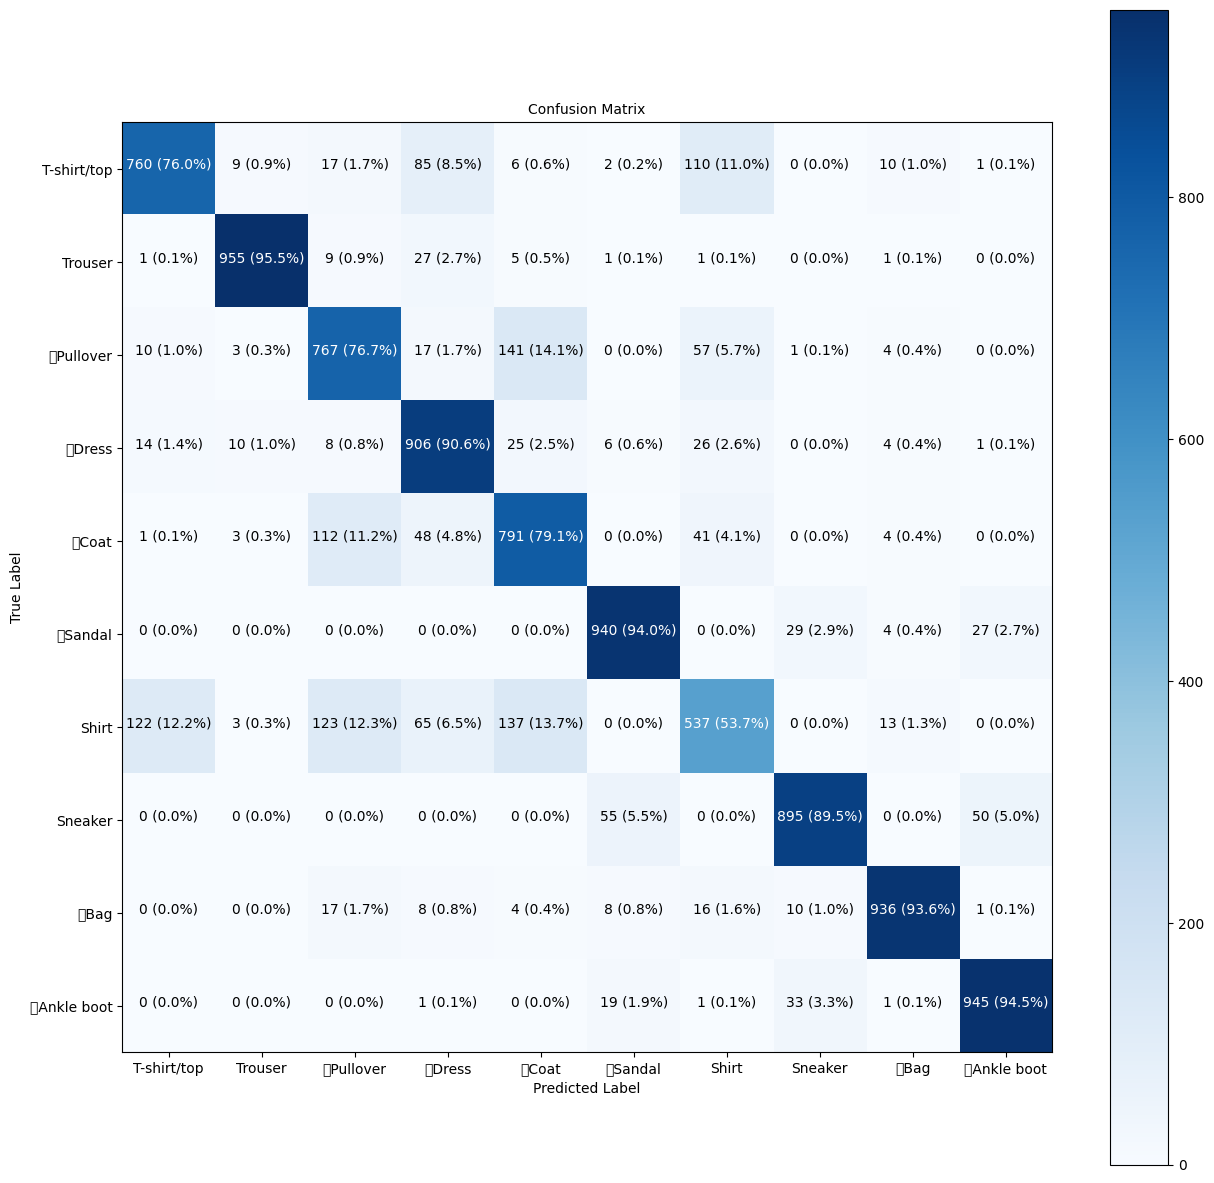

In [ ]:
#MAKE A prettier Confusion matrixs
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_name,
                      figsize=(15,15),
                      text_size=10)

#function
1.  plot a random image
2.  make a prediction on said image
3.  label the plot with the truth label and the predicted label


In [ ]:
import random
import matplotlib.pyplot as plt
import tensorflow as tf

def plot_random_image(models, images, true_labels, class_names):
    # 1. Pick a random index within the range of available images
    i = random.randint(0, len(images) - 1)

    # 2. Select the target image and corresponding true label
    target_image = images[i]

    # 3. Predict the probability distribution over classes
    pred_probs = models.predict(target_image.reshape(1, 28, 28))  # reshaped to (1, 28, 28)

    # 4. Get the predicted label/class with the highest probability
    pred_label = class_names[pred_probs.argmax()]

    # 5. Get the true label
    true_label = class_names[true_labels[i]]

    # 6. Plot the image
    plt.imshow(target_image, cmap=plt.cm.binary)

    # 7. Set the color of the label based on correctness
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"

    # 8. Add prediction label, confidence, and true label in x-axis with color
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(
        pred_label,
        100 * tf.reduce_max(pred_probs),
        true_label
    ), color=color)

    # 9. Show the plot
    plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


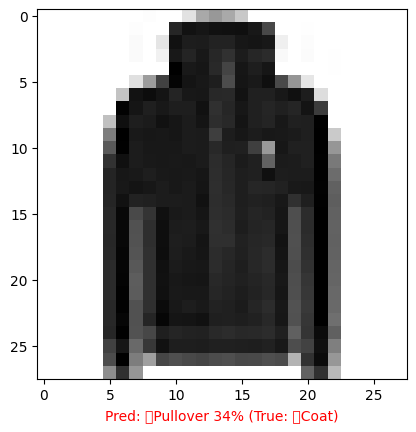

In [ ]:
#check out a random image as well as its prediction
plot_random_image(model_3,test_data_norm,test_labels,class_name)